In [ ]:
# Cho tập dữ liệu Wine Quality
# 1. Đọc dữ liệu, sau đó hiển thị 5 dòng đầu tiên, thông tin về dữ liệu, thống kê mô tả

# 2. Phân tích khám phá dữ liệu
# 2.1 Kiểm tra giá trị thiếu
# 2.2 Vẽ histogram cho tất cả các biến và nhận xét
# 2.3 Vẽ boxplot cho tất cả các biển và nhận xét
# 2.4 Vẽ Scatterplot cho "alcohol và quality"

# 3. Tính toán ma trận tương quan và vẽ heatmap của ma trận tương quan đó

# 4. Chia tập dữ liệu thủ công không dùng thư viện có sẵn
# 4.1 Xáo trộn dữ liệu
# 4.2 Chia dữ liệu với 80% huấn luyện
# 4.3 Tách dữ liệu
# 4.4 Tách đặc trưng và nhãn

# 5. Chuẩn bị dữ liệu
# 5.1 Khởi tạo bộ dữ liệu chuẩn hóa
# 5.2 Chuẩn hóa huấn luyện
# 5.3 Chuẩn hóa kiểm tra

# 6. Ứng dụng mô hình hồi quy tuyến tính
# 6.1 Khởi tạo
# 6.2 Huấn luyện
# 6.3 Dự đoán trên tập kiểm tra

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2    

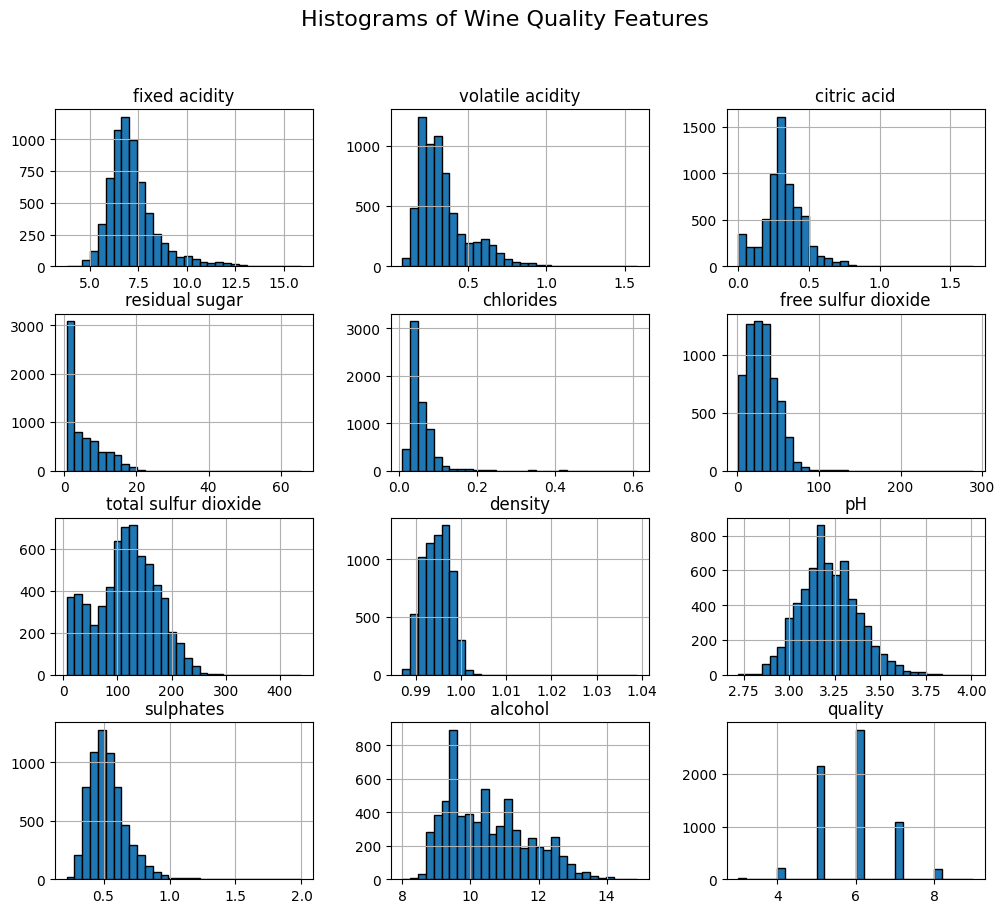

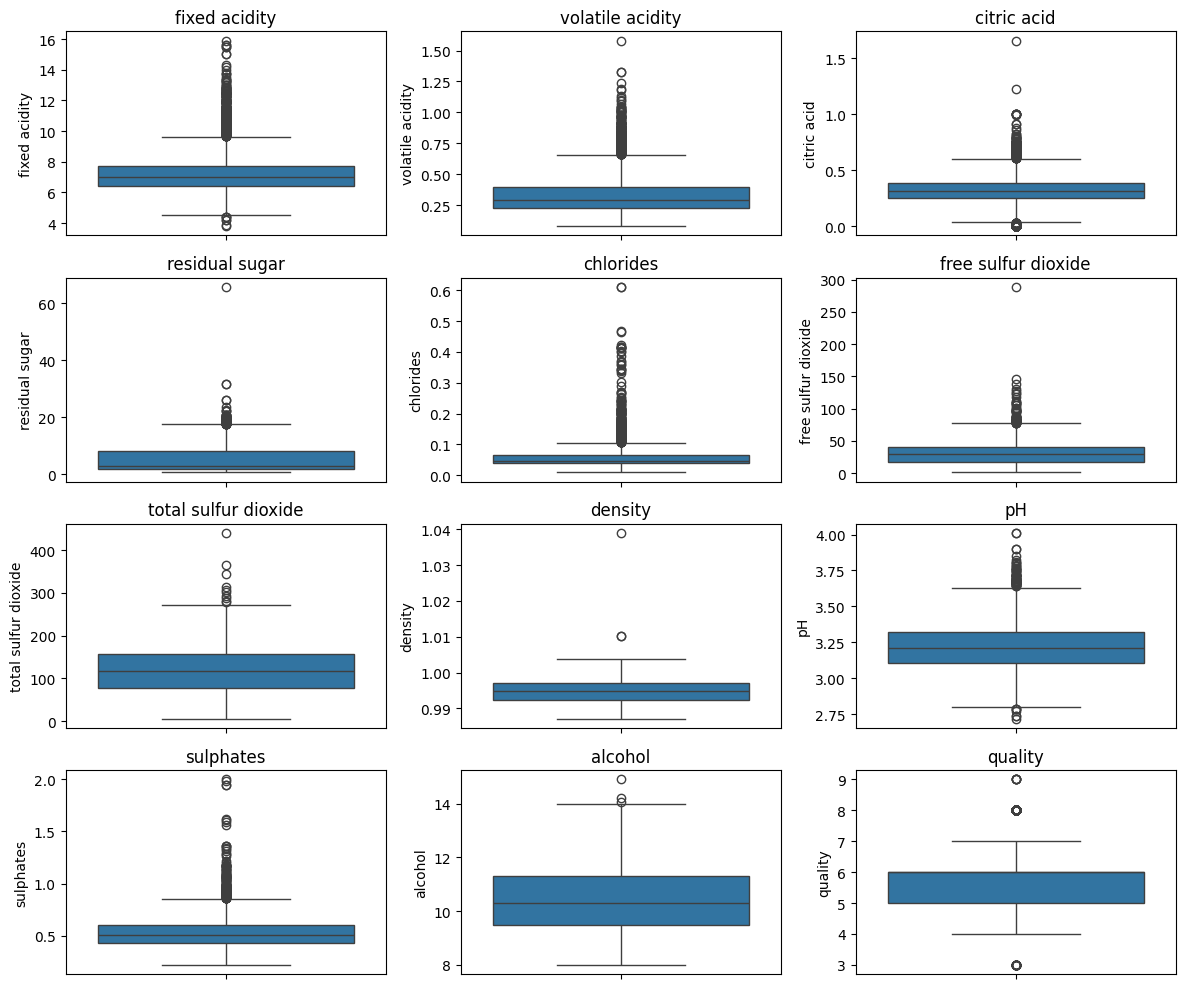

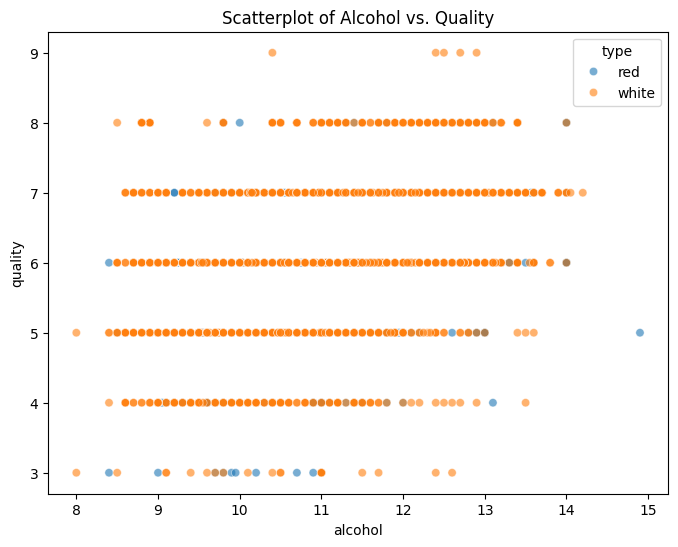

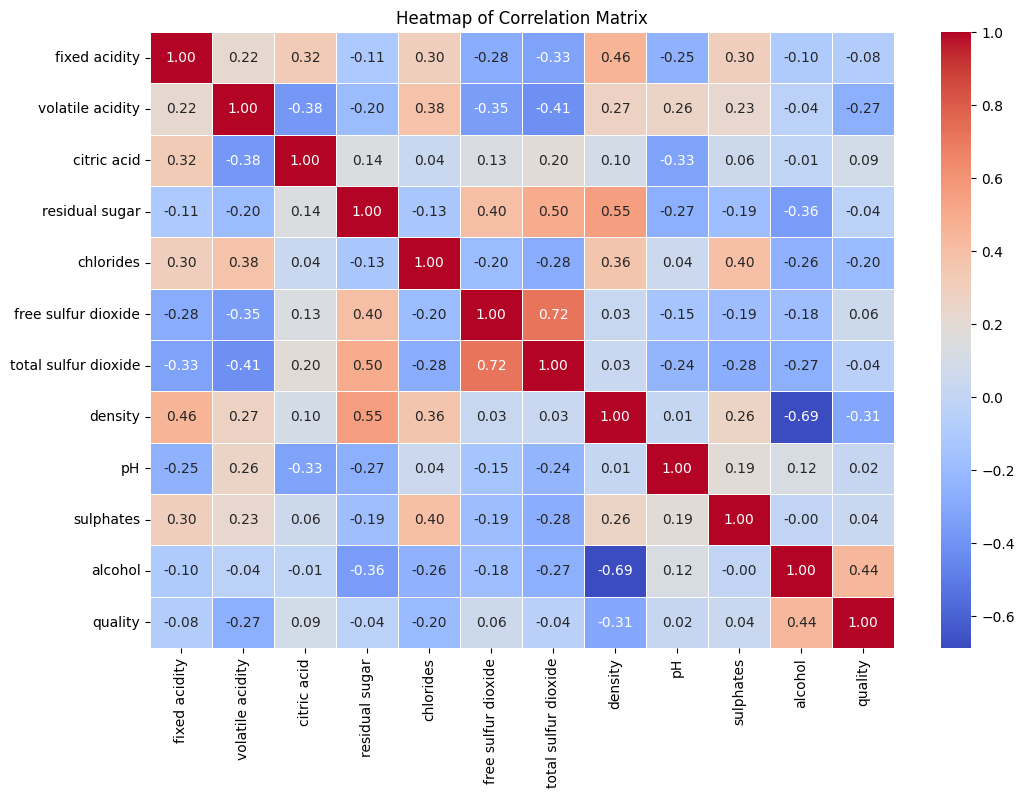

X_train shape: (5197, 12)
y_train shape: (5197,)
X_test shape: (1300, 12)
y_test shape: (1300,)
Dữ liệu huấn luyện sau khi chuẩn hóa: [[-0.1701872  -1.04058836  2.92028857  1.55834237 -0.31502126 -0.35890859
   0.18519592 -0.17753795  0.25721697 -1.01344858  1.43727643]
 [ 0.36409311  1.82012636 -0.75002333 -0.69043172  0.5559707   0.08831264
   0.30795126  0.29508244  0.31910671 -0.55093624 -0.49206695]
 [-0.32283872  0.29846959  0.15024185  0.41274048 -0.99548372  0.42372857
   0.30795126 -0.87971681 -0.23790099 -0.61700943  1.26950744]
 [-0.70446751 -0.37105938  1.05050704  1.21890477 -0.45111375  1.70948961
   1.1847751   0.40310996 -0.60923945 -0.1544971  -0.82760493]
 [ 0.13511583  0.05500451 -0.81927449  1.79170572 -0.07005477  1.82129492
   1.99145302  1.4023645  -0.6711292  -0.22057029 -1.3309119 ]]
Dữ liệu kiểm tra sau khi chuẩn hóa: [[ 2.50121433  1.02886484  2.22777689 -0.64800202  1.37252565 -1.36515637
  -1.76135299  0.86897863 -0.79490869  0.83660077  1.10173845]
 [-1.08

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Đọc dữ liệu
url_red = "winequality-red.csv"
url_white = "winequality-white.csv"

# Đọc dữ liệu
red_wine = pd.read_csv(url_red, sep=';')
white_wine = pd.read_csv(url_white, sep=';')

# Thêm cột phân loại
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Gộp hai tập dữ liệu
wine_data = pd.concat([red_wine, white_wine], axis=0)

# Hiển thị 5 dòng đầu tiên
print(wine_data.head())

# Thông tin về dữ liệu
print(wine_data.info())

# Thống kê mô tả
print(wine_data.describe())

# 2.1 Kiểm tra giá trị thiếu
print(wine_data.isnull().sum())

# 2.2 Vẽ histogram cho tất cả các biến
wine_data.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Histograms of Wine Quality Features", fontsize=16)
plt.show()

# 2.3 Vẽ boxplot cho tất cả các biến
plt.figure(figsize=(12, 10))
for i, col in enumerate(wine_data.columns[:-1], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=wine_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# 2.4 Vẽ scatterplot giữa alcohol và quality
plt.figure(figsize=(8, 6))
sns.scatterplot(data=wine_data, x="alcohol", y="quality", hue="type", alpha=0.6)
plt.title("Scatterplot of Alcohol vs. Quality")
plt.show()

# 3. Tính toán ma trận tương quan và vẽ heatmap
correlation_matrix = wine_data.drop(columns=['type']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()

# 4. Chia tập dữ liệu thủ công
# 4.1 Xáo trộn dữ liệu
wine_data = wine_data.sample(frac=1, random_state=42).reset_index(drop=True)

# 4.2 Chia dữ liệu với 80% huấn luyện
train_size = int(0.8 * len(wine_data))
train_data = wine_data[:train_size]
test_data = wine_data[train_size:]

# 4.3 Tách dữ liệu
X_train = train_data.drop(columns=['quality'])
y_train = train_data['quality']
X_test = test_data.drop(columns=['quality'])
y_test = test_data['quality']

# 4.4 Tách đặc trưng và nhãn
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# 5. Chuẩn bị dữ liệu
# 5.1 Khởi tạo bộ dữ liệu chuẩn hóa
scaler = StandardScaler()

# 5.2 Chuẩn hóa huấn luyện
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=[np.number]))

# 5.3 Chuẩn hóa kiểm tra
X_test_scaled = scaler.transform(X_test.select_dtypes(include=[np.number]))

print("Dữ liệu huấn luyện sau khi chuẩn hóa:", X_train_scaled[:5])
print("Dữ liệu kiểm tra sau khi chuẩn hóa:", X_test_scaled[:5])

# 6. Ứng dụng mô hình hồi quy tuyến tính
# 6.1 Khởi tạo
model = LinearRegression()

# 6.2 Huấn luyện
model.fit(X_train_scaled, y_train)

# 6.3 Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
